# Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Model Functions

In [2]:
def mean(values):
    return sum(values) / len(values)


def covariance(x, y, x_mean, y_mean):
    return sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y)) / len(x)


def variance(values, mean):
    return sum((xi - mean) ** 2 for xi in values) / len(values)


def multiple_linear_regression(X, y):
    if len(X) != len(y):
        raise ValueError("Number of samples in X and y must be the same")

    num_features = len(X[0])
    num_samples = len(X)

    X_means = [mean([X[i][j] for i in range(num_samples)]) for j in range(num_features)]
    y_mean = mean(y)

    covariances = [covariance([X[i][j] for i in range(num_samples)], y, X_means[j], y_mean) for j in
                   range(num_features)]

    variances = [variance([X[i][j] for i in range(num_samples)], X_means[j]) for j in range(num_features)]

    coefficients = [covariances[j] / variances[j] for j in range(num_features)]

    beta_0 = y_mean - sum(coefficients[j] * X_means[j] for j in range(num_features))

    return [beta_0] + coefficients


# Test Model

In [3]:
data = pd.read_csv('USA_Housing.csv')

data.rename(columns={'Avg. Area Income': 'Income', 'Avg. Area House Age': 'Age', 'Avg. Area Number of Rooms': 'Rooms',
                     'Avg. Area Number of Bedrooms': 'Bedrooms', 'Area Population': 'Population'}, inplace=True)
data.head()

data['Price'] = data['Price'].astype('int64')

data.info()
data.drop(['Address'], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   Age         5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   int64  
 6   Address     5000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   Age         5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   int64  
dtypes: float64(5), int64(1

In [5]:
x = data[['Income', 'Age', 'Rooms', 'Bedrooms', 'Population']].values
X = []
for i in x:
    X.append(list(i))
    
y = data[['Price']].values
Y = []
for i in y:
    Y.extend(i)


coefficients = multiple_linear_regression(X, Y)
print(coefficients)

def predict(coefficients, x):
    return coefficients[0] + sum(coefficients[i + 1] * x[i] for i in range(len(x)))

[-2728938.2833385626, 21.195482930331742, 161177.8185799772, 117841.63647111373, 48947.71122485626, 14.534894660775654]


In [11]:
y_pred = [predict(coefficients, x) for x in X]
r2 = r2_score(Y, y_pred)
print("R-squared (R2) value:", r2)

R-squared (R2) value: 0.8912063176993581


# Plot Regression Line

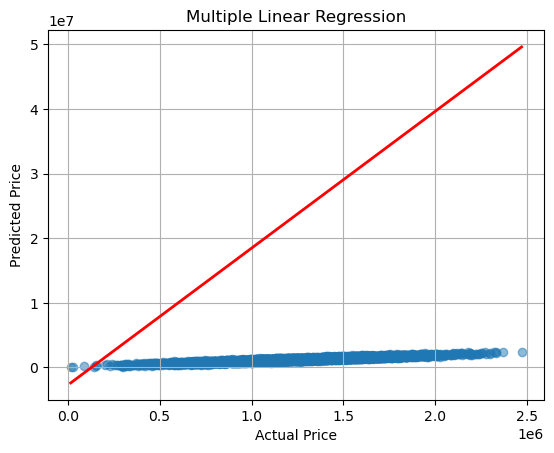

In [8]:
plt.scatter(Y, [predict(coefficients, x) for x in X], alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

x_range = np.linspace(min(Y), max(Y), 100)
y_range = [predict(coefficients, [x]) for x in x_range]
plt.plot(x_range, y_range, color='red', linewidth=2)

plt.title("Multiple Linear Regression")
plt.grid(True)
plt.show()